In [1]:
from symbulate import *
%matplotlib inline

In [2]:
states = [1, 2]

Pm = [[0.128, 0.872],
     [0.663, 0.337]]

pi0 = [1, 0]


P = MarkovChainProbabilitySpace(transition_matrix=Pm, initial_dist=pi0, state_labels=states)

X = RV(P)

V1 = X[range(0, 5)].apply(count_eq(1))

In [3]:
path = P.draw()
path

(1, 2, 1, 2, 2, 1, ...)

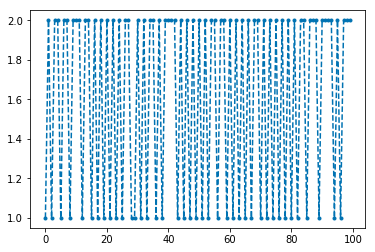

In [25]:
path.plot(tmax=100)

In [5]:
X(path)

(1, 2, 1, 2, 2, 1, ...)

In [6]:
V1(path)

2

(0.5079199999999999, 0.12335831386655702)

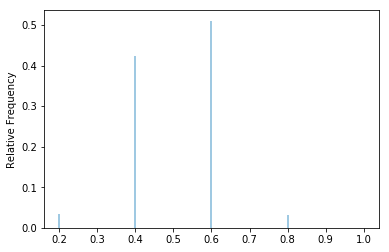

In [7]:
v = (V1 / 5).sim(10000)
v.plot()
v.mean(), v.sd()

In [8]:
V1 = X[range(0, 10)].apply(count_eq(1))
V1(path)

4

(0.47031000000000006, 0.08481452646805261)

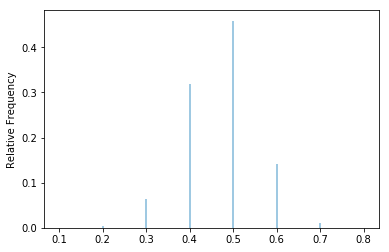

In [9]:
v = (V1 / 10).sim(10000)
v.plot()
v.mean(), v.sd()

(0.4415799999999999, 0.04342929426090183)

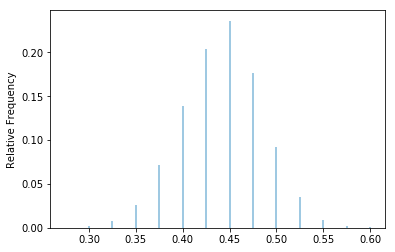

In [10]:
V1 = X[range(0, 40)].apply(count_eq(1))
v = (V1 / 40).sim(10000)
v.plot()
v.mean(), v.sd()

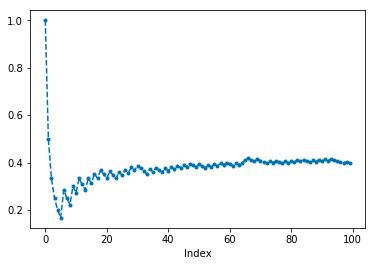

In [11]:
pi_hat1 = RandomProcess(P)

for n in range(0, 101):
    pi_hat1[n] = (X[range(0, n + 1)].apply(count_eq(1)) / (n + 1) )
    
pi_hat1.sim(1).plot(tmax=100)

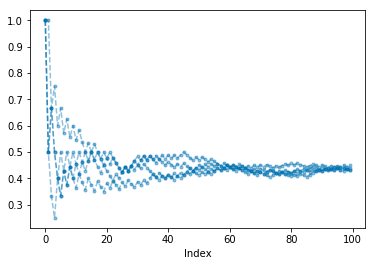

In [12]:
pi_hat1.sim(4).plot(tmax=100)

(0.43689108910891106, 0.026820764283029132)

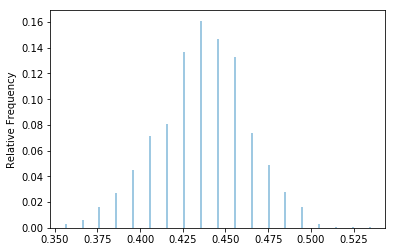

In [13]:
phats = pi_hat1[100].sim(1000)
phats.plot()
phats.mean(), phats.sd()

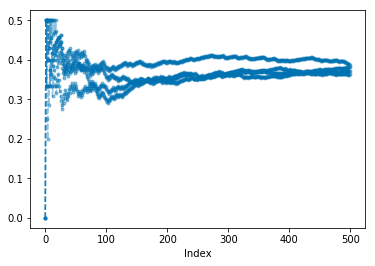

In [15]:
states = [0, 1, 2, 3]

Pm = [[0, 1, 0, 0],
      [1/3, 0, 2/3, 0],
      [0, 2/3, 0, 1/3],
      [0, 0, 1, 0]]

pi0 = [1, 0, 0, 0]

P = MarkovChainProbabilitySpace(transition_matrix=Pm, initial_dist=pi0, state_labels=states)

X = RV(P)

pi_hat1 = RandomProcess(P)

for n in range(0, 501):
    pi_hat1[n] = (X[range(0, n + 1)].apply(count_eq(1)) / (n + 1) )
    
pi_hat1.sim(4).plot(tmax=500)

In [26]:
states = [1, 2, 3]

Pm = [[0, 0.7, 0.3],
      [0.8, 0, 0.2],
      [0.6, 0.4, 0]]

pi0 = [1, 0, 0]


P = MarkovChainProbabilitySpace(transition_matrix=Pm, initial_dist=pi0, state_labels=states)

X = RV(P)

V1 = X[range(0, 101)].apply(count_eq(1))

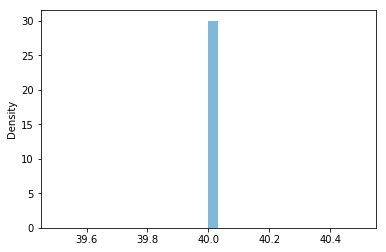

In [27]:
V1.sim(1).plot()

(0.4249801980198022, 0.019863940192928402)

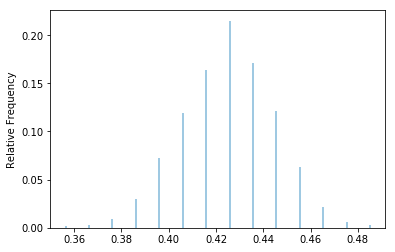

In [24]:
v = (V1 / 101).sim(1000)
v.plot()
v.mean(), v.sd()

In [22]:
def hitting_time_in_state(sequence, state):
    return next( (i for i, x in enumerate(sequence) if ((x == state) & (i > 0)) ), 999999999)

hitting_time_in_state((1,2,3,2,3,2,1), 1)

6

(2.362, 0.7316802580362545)

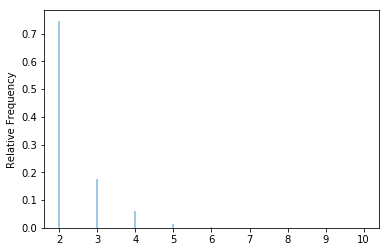

In [23]:
T = RV(P, lambda x: hitting_time_in_state(x, 1))
t = T.sim(10000)
t.plot()
t.mean(), t.sd()